In [1]:
# Cleveland Analysis Notebook
# ===========================
#
# This notebook contains charts and summary info for the 
# UCI Heart Disease Cleveland dataset at:
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
# The only modifications to the dataset are that 'num' has been renamed
# to 'target' and column headers have been added.
#
# We can see from this notebook that most features of interest 
# in the Cleveland dataset appear comparable to the corresponding
# features in the other dataset with respect to the distribution of
# data and the association between the various features and the
# target. Most of these features also correct with respect to the
# medical theory.
#
# Exceptions to this are cp (chest pain), which does not appear to
# show the correlation with heart disease that one would expect. It
# is, however, distributed in a very similar way to the data in the
# other datasets.
#
# The correlations between age / fbs / trestbps and heart disease are
# also weaker in the Cleveland dataset than they are in the other 
# datasets. Nevertheless, the correlation does appear to be present 
# and going in the right direction.

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
GIT_ROOT <- system2('git', args=c('rev-parse', '--show-toplevel'), stdout=TRUE)
DATA <- file.path(GIT_ROOT, 'data')
CLEVELAND_DATASET_PATH <- file.path(DATA, 'cleveland.csv')

In [3]:
# Print basic summary information about a dataset including:
# - Total targetber of rows in the dataset.
# - For each column, how many rows are not null.
# - For each column, what fraction of rows are not null.
summarize_dataset <- function(dataset) {
    total_samples <- nrow(dataset)
    sprintf('total samples: %d\n', total_samples) %>% cat()
    for (column in names(dataset)) {
        not_null <- sum(complete.cases(dataset[[column]]))
        percent_not_null = not_null / total_samples * 100
        sprintf('%s (not null): %d (%.1f%%)\n', column, not_null, percent_not_null) %>% cat()
    }
    
}

In [4]:
# Construct and return a dataframe from the given dataset where 
# the heart disease class is grouped by the target attribute with
# classes given as a vector. The columns in the dataframe will be
# 'heart_disease_class', the name of the grouping attribute, and 
# 'fraction', which is the fraction of the attribute that belongs
# to the heart disease class given by the first column.
group_by_attribute <- function(dataset, attribute, classes) {
    class_totals <- list()
    for(i in 1:length(classes)) class_totals[i] <- sum(dataset[[attribute]] == classes[i], na.rm=TRUE)
    fractions <- list()
    categories <- list()
    categories_by_attribute <- data.frame()
    for(heart_disease_class in 0:4) {
        for(i in 1:length(classes)) {
            attribute_class <- classes[i]
            samples_per_class <- dataset[dataset$target == heart_disease_class,][[attribute]] == attribute_class
            sample_count <- sum(samples_per_class, na.rm=TRUE)
            class_total <- class_totals[[i]]
            fraction <- sample_count / class_total
            categories_by_attribute <- rbind(categories_by_attribute, 
                                             c(heart_disease_class, attribute_class, fraction))       
        }
    }
    colnames(categories_by_attribute) <- c('heart_disease_class', attribute, 'fraction')
    return(categories_by_attribute)
}

In [5]:
# Construct and return a contingency table for the given dataset where
# heart disease class is the primary group and the target attribute
# is the sub-group, classes is a vector of all attribute classes, and
# labels is a vector of strings describing classes.
contingency_table <- function(dataset, attribute, classes, labels) {
    table <- data.frame()
    for(k in labels) table[[k]] <- as.numeric()
    for(target in 0:4) {
        row_values <- list()
        for(i in 1:length(classes)) {
            attribute_class <- classes[i]
            row_values[i] <- sum(dataset[dataset$target == target,][[attribute]] == attribute_class, na.rm=TRUE)  
        }
        #names(row_values) <- labels
        table <- rbind(table, row_values)
    }
    colnames(table) <- labels
    row.names(table) <- 0:4
    return(table)
}

In [6]:
cleveland_dataset <- read_csv(CLEVELAND_DATASET_PATH)
sprintf('dataset: %s\n', CLEVELAND_DATASET_PATH) %>% cat()
cleveland_dataset <- 
  cleveland_dataset %>% 
    mutate_if(is.character, list(~na_if(., "?")))

cleveland_dataset


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  target = col_double()
)




dataset: /home/jgenson/Development/qdaim/data/cleveland.csv


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [7]:
summarize_dataset(cleveland_dataset)

total samples: 303
age (not null): 303 (100.0%)
sex (not null): 303 (100.0%)
cp (not null): 303 (100.0%)
trestbps (not null): 303 (100.0%)
chol (not null): 303 (100.0%)
fbs (not null): 303 (100.0%)
restecg (not null): 303 (100.0%)
thalach (not null): 303 (100.0%)
exang (not null): 303 (100.0%)
oldpeak (not null): 303 (100.0%)
slope (not null): 303 (100.0%)
ca (not null): 299 (98.7%)
thal (not null): 301 (99.3%)
target (not null): 303 (100.0%)


In [8]:
# Summary statistics for age.
summary(cleveland_dataset$age, na.rm=T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   48.00   56.00   54.44   61.00   77.00 

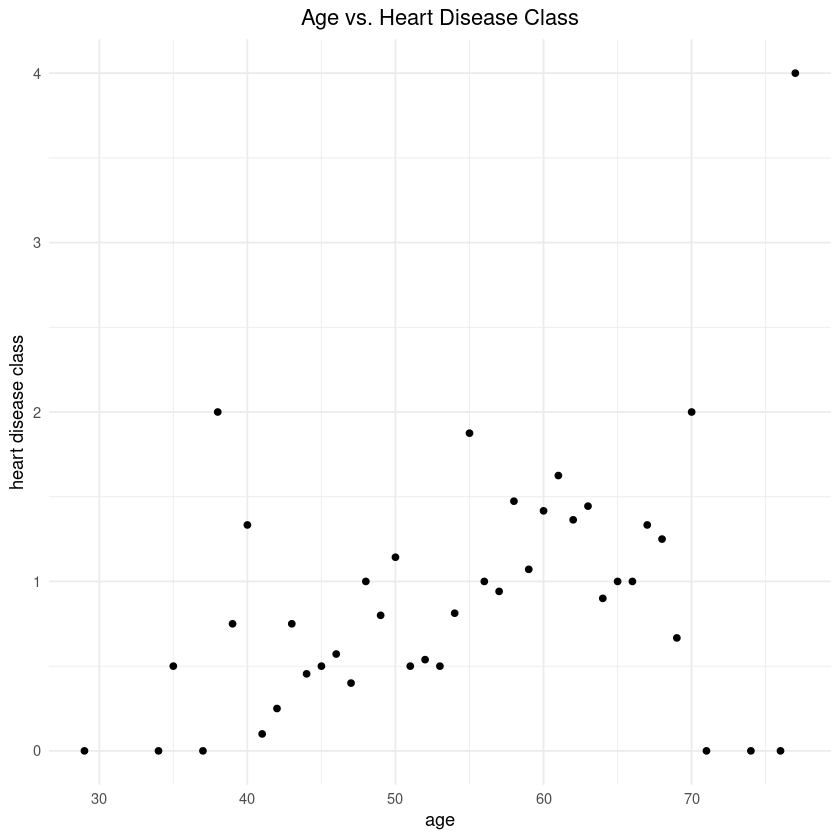

In [9]:
# Scatter plot showing age vs. average heart disease class.
average_class_per_age = aggregate(target ~ age, cleveland_dataset, mean)
ggplot(average_class_per_age, aes(x=age, y=target)) + ggtitle(label='Age vs. Heart Disease Class') + ylab('heart disease class') + geom_point() + theme_minimal() + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

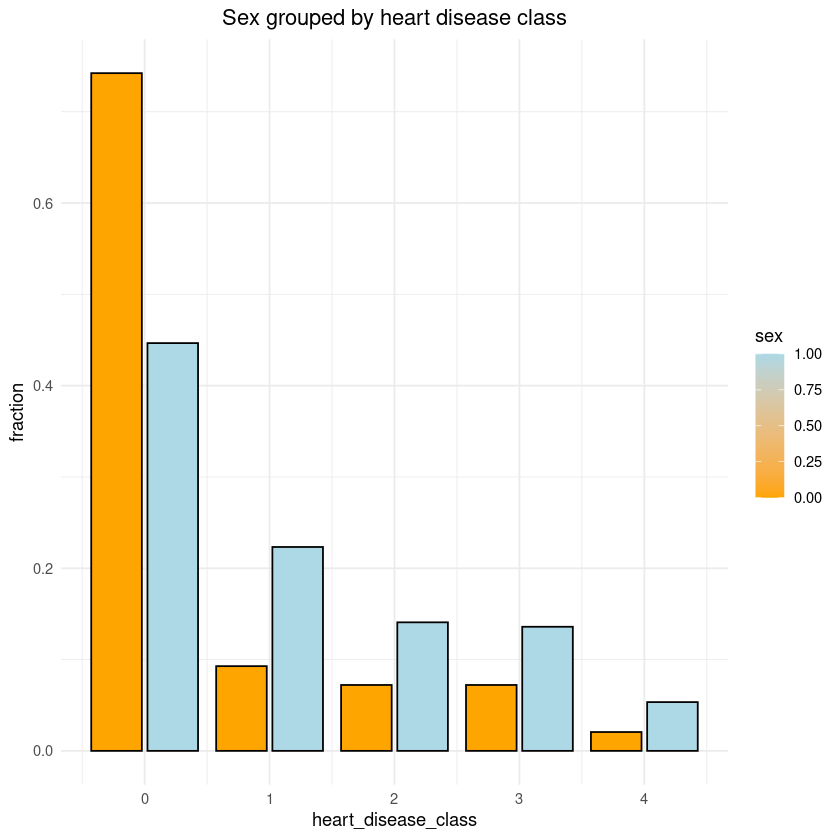

In [10]:
# Bar graph of sex grouped by heart disease classes.
sex_by_class <- group_by_attribute(cleveland_dataset, 'sex', c(0, 1))
ggplot(sex_by_class, aes(fill=sex, y=fraction, x=heart_disease_class)) + ggtitle(label='Sex grouped by heart disease class') + geom_bar(position=position_dodge2(), stat='identity', color='black') + theme_minimal() + scale_fill_gradient(low='orange', high='lightblue') + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

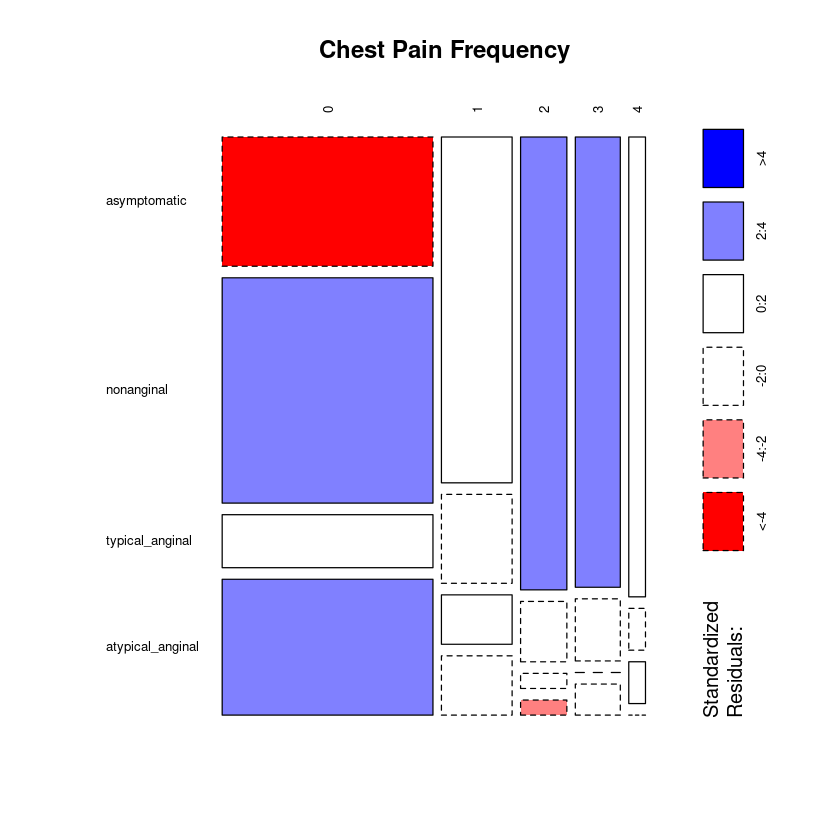

In [11]:
# Mosaic plot of chest pain class vs. heart disease class.
cp_contingency <- contingency_table(cleveland_dataset, 
                                    'cp', 
                                    c(4, 3, 1, 2), 
                                    c('asymptomatic', 'nonanginal', 'typical_anginal', 'atypical_anginal'))

mosaicplot(cp_contingency, shade=TRUE, las=2, main='Chest Pain Frequency')

In [12]:
# Summary statistics for resting systolic blood pressure.
summary(cleveland_dataset$trestbps, na.rm=T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   120.0   130.0   131.7   140.0   200.0 

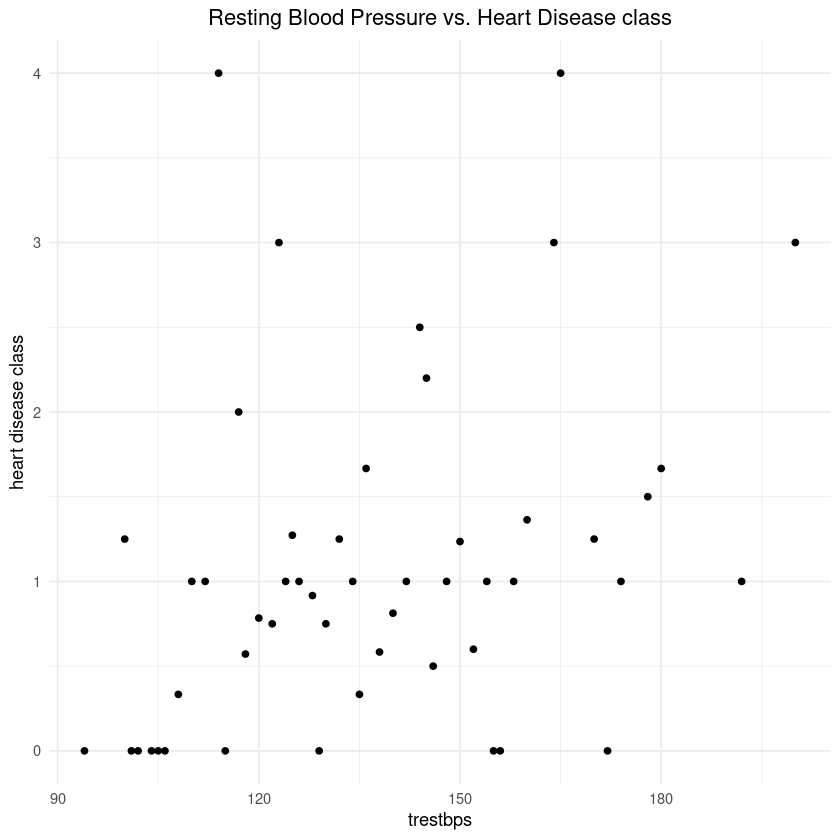

In [13]:
# Scatter plot showing average heart disease class per resting systolic blood pressure.
average_class_per_resting_bp = aggregate(target ~ trestbps, cleveland_dataset, mean)
ggplot(average_class_per_resting_bp, aes(x=trestbps, y=target)) + ggtitle(label='Resting Blood Pressure vs. Heart Disease class') + ylab('heart disease class') + geom_point() + theme_minimal() + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

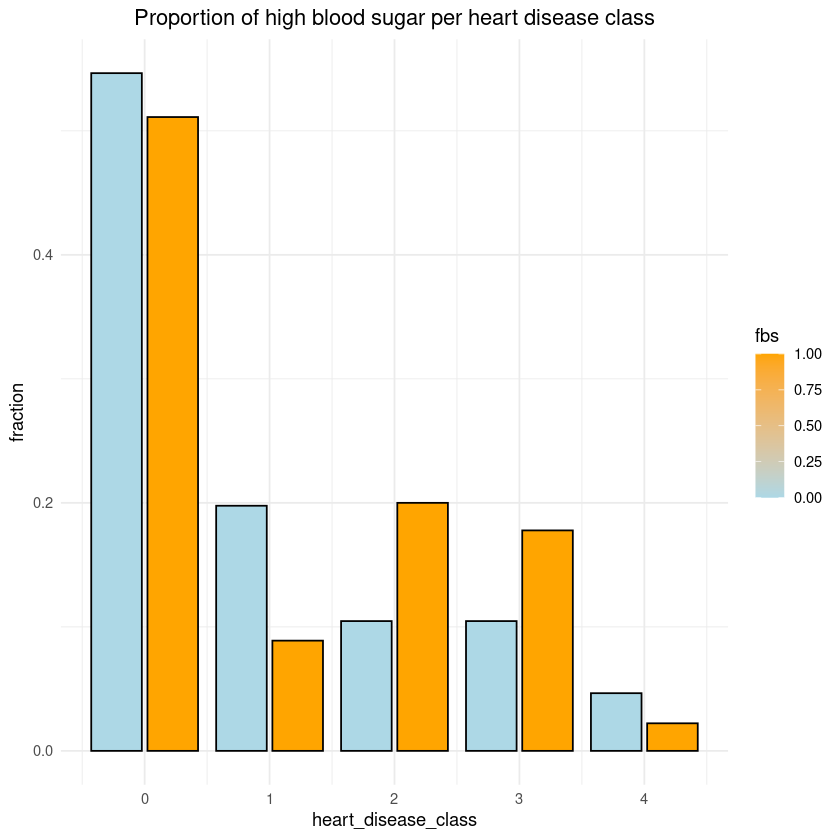

In [14]:
# Bar graph of heart disease categories grouped fasting blood sugar.
categories_by_fbs <- group_by_attribute(cleveland_dataset, 'fbs', c(0, 1))
ggplot(categories_by_fbs, aes(fill=fbs, y=fraction, x=heart_disease_class)) + ggtitle(label='Proportion of high blood sugar per heart disease class') + geom_bar(position=position_dodge2(), stat='identity', color='black') + theme_minimal() + scale_fill_gradient(low='lightblue', high='orange') + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

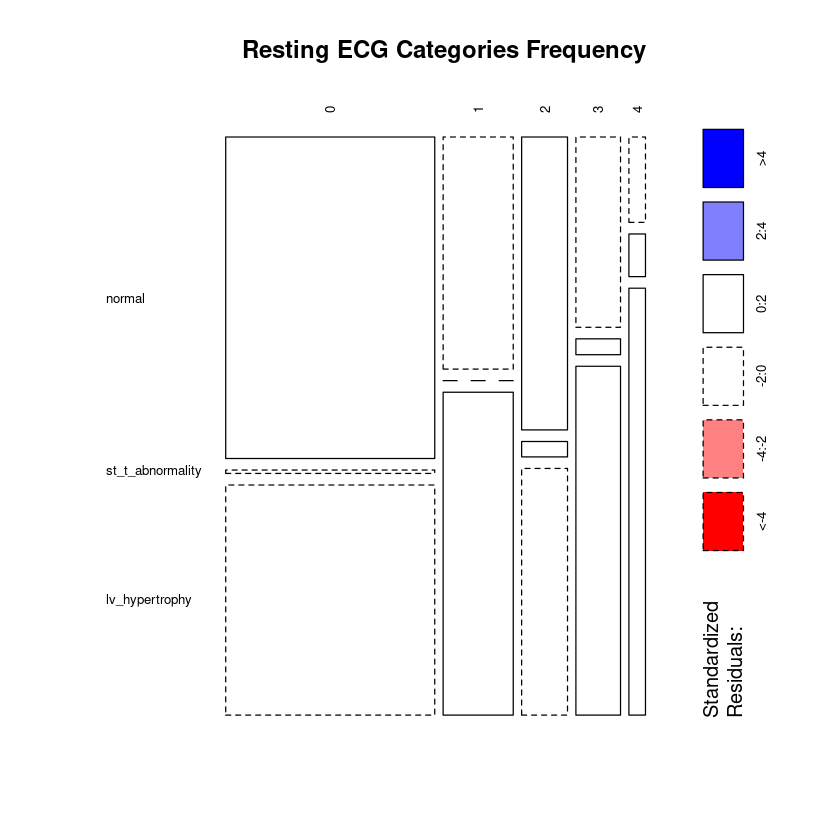

In [15]:
# Mosaic plot of resting ECG class vs. heart disease class.
restecg_contingency <- contingency_table(cleveland_dataset,
                                         'restecg',
                                         c(0, 1, 2),
                                         c('normal', 'st_t_abnormality', 'lv_hypertrophy'))

mosaicplot(restecg_contingency, shade=TRUE, las=2, main='Resting ECG Categories Frequency')

In [16]:
# Summary statistics for peak exercise heart rate (thalach).
summary(cleveland_dataset$thalach)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   133.5   153.0   149.6   166.0   202.0 

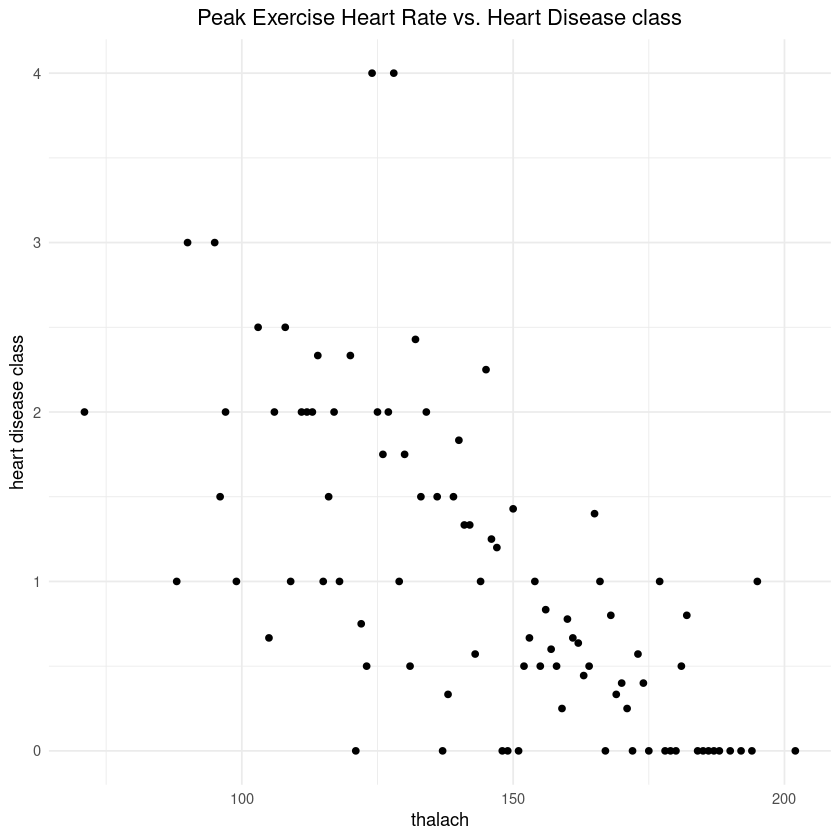

In [17]:
# Scatter plot of peak exercise heart rate vs. average heart disease class.
average_class_per_thalach = aggregate(target ~ thalach, cleveland_dataset, mean)
ggplot(average_class_per_thalach, aes(x=thalach, y=target)) + ggtitle(label='Peak Exercise Heart Rate vs. Heart Disease class') + ylab('heart disease class') + geom_point() + theme_minimal() + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

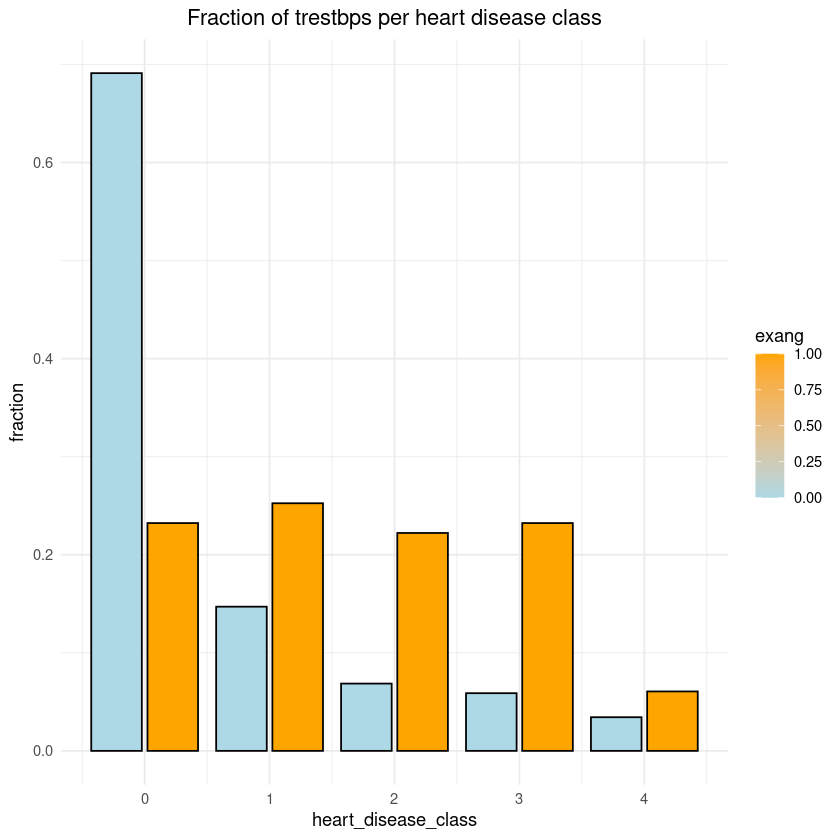

In [18]:
# Bar graph of heart disease categories grouped by exang (exercise-induced angina).
categories_by_exang <- group_by_attribute(cleveland_dataset, 'exang', c(0, 1))
ggplot(categories_by_exang, aes(fill=exang, y=fraction, x=heart_disease_class)) + ggtitle(label='Fraction of trestbps per heart disease class') + geom_bar(position=position_dodge2(), stat='identity', color='black') + theme_minimal() + scale_fill_gradient(low='lightblue', high='orange') + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

In [19]:
# Summary statistics for ST-segment depression during exercise (oldpeak).
summary(cleveland_dataset$oldpeak)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.80    1.04    1.60    6.20 

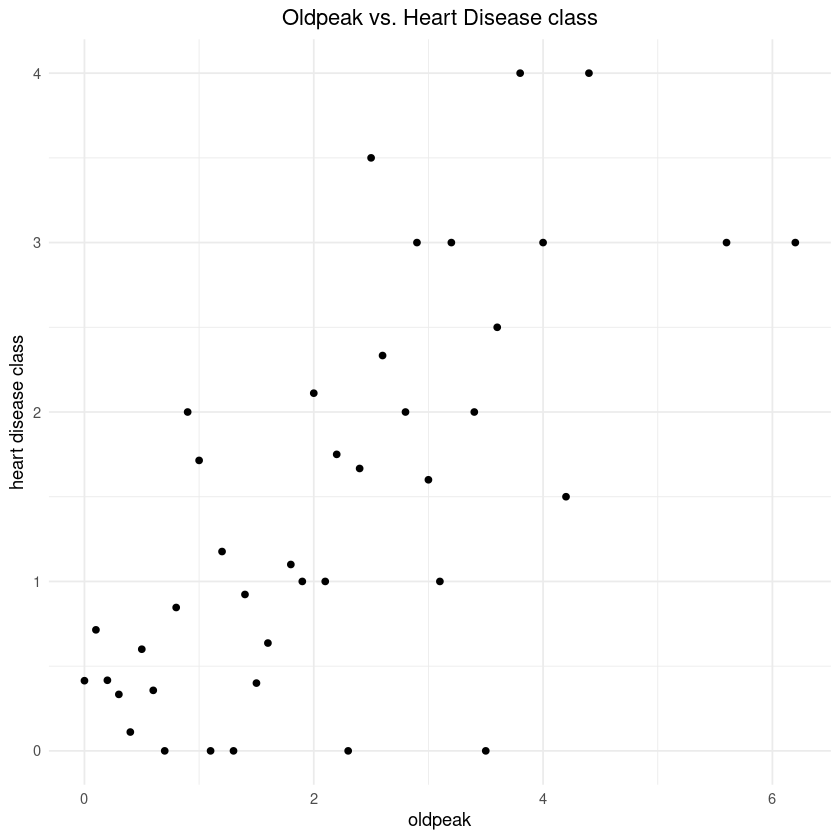

In [20]:
# Scatter plot of oldpeak vs. average heart disease class.
average_class_per_oldpeak = aggregate(target ~ oldpeak, cleveland_dataset, mean)
ggplot(average_class_per_oldpeak, aes(x=oldpeak, y=target)) + ggtitle(label='Oldpeak vs. Heart Disease class') + ylab('heart disease class') + geom_point() + theme_minimal() + theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))